# Name: Bharathkumar M S
    
# Project Name: Car Price Prediction

## Importing the Libraries and the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **1. Understanding the Dataset**

In [2]:
df=pd.read_csv(r'C:\Users\bhara\Downloads\assignment\ass\car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df[Seller_Type].

SyntaxError: invalid syntax (2632545920.py, line 1)

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: >

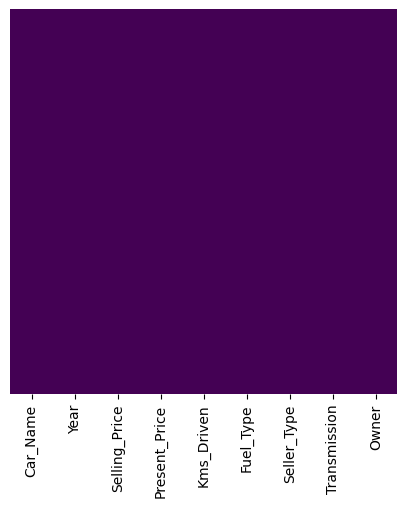

In [7]:
# Visualising Missing Values
plt.figure(figsize=[5,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So we have no missing values in any column

In [8]:
# creating a new column named 'Age' to know how old the car is
df['Age']=2020-df['Year']

In [9]:
df.drop('Year',axis=1,inplace=True)

## **2. Exploratory Data Analysis**

### **Univariate Analysis**

#### Categorical Features Visualisation

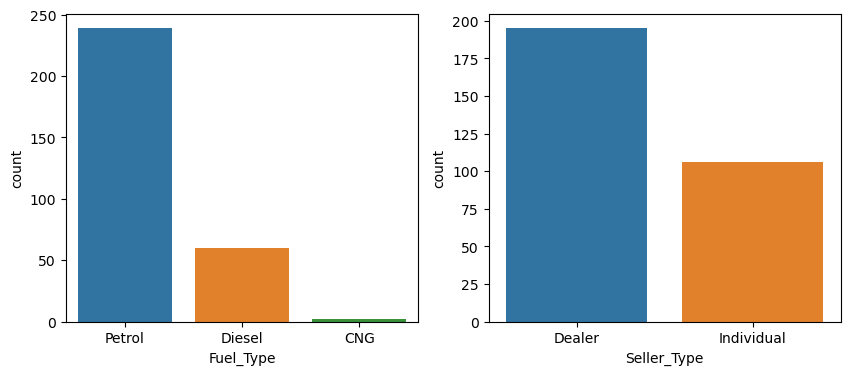

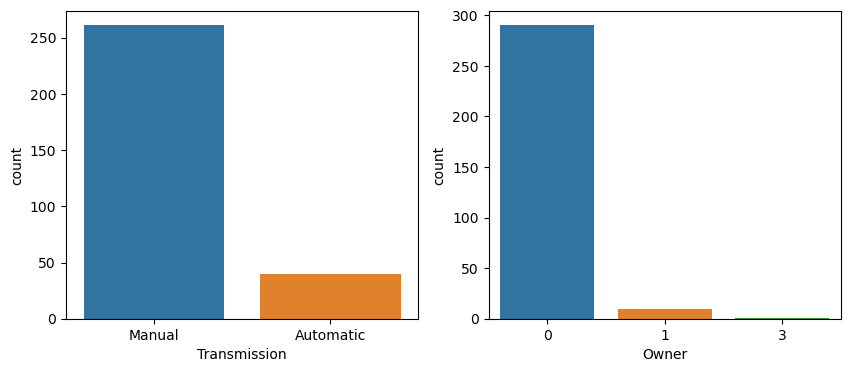

In [10]:
categ_cols=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=categ_cols[i], data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=categ_cols[i], data=df)
    i += 1
    
    plt.show()

#### Numerical features to visualise outliers

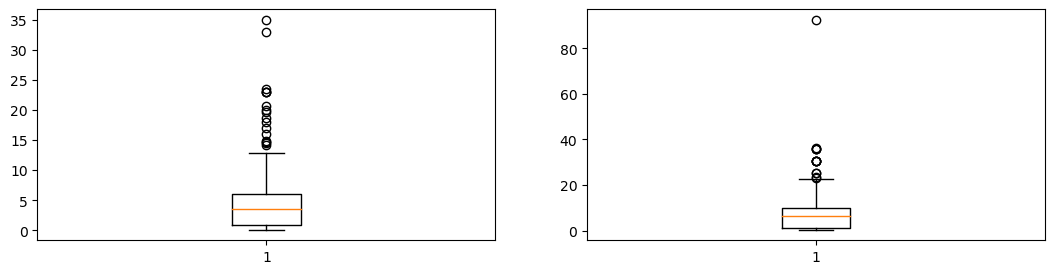

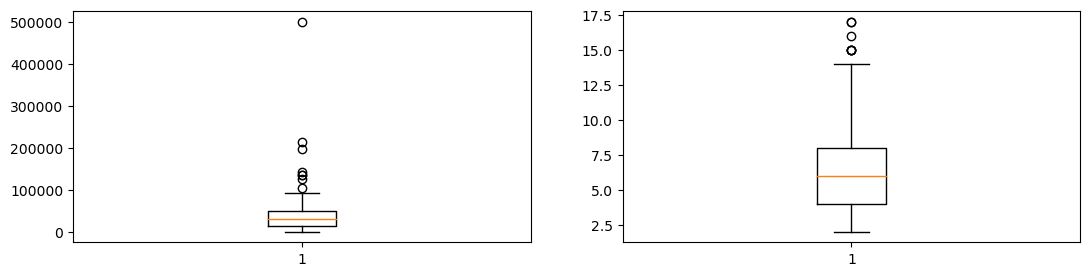

In [11]:
num_cols=['Selling_Price', 'Present_Price', 'Kms_Driven','Age']
i=0 
while(i<4):
    plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    plt.boxplot(x=num_cols[i],data=df)
    i+=1
    plt.subplot(1,2,2)
    plt.boxplot(x=num_cols[i],data=df)
    i+=1
    plt.show()

### **Bivariate Analysis**

<Axes: >

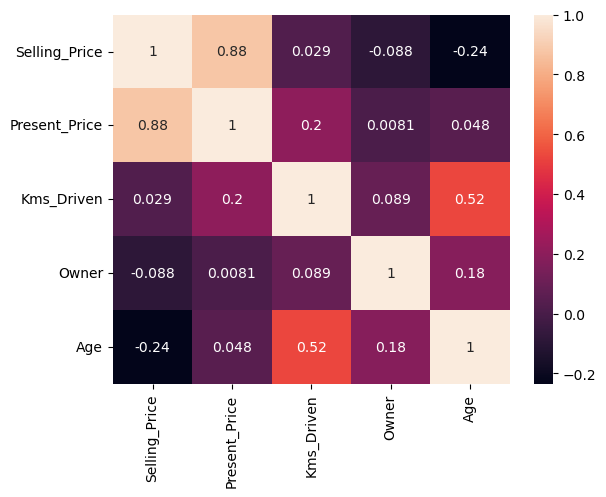

In [12]:
sns.heatmap(df.corr(),annot=True)

* Selling Price of a car is more correlated with Present Price
* Selling Price is also correlated with the Age of car

## **3. Data Preparation**

### **One-Hot Encoding for categorical features**

In [13]:
# dropping CarName as it has no effect in our model to predict the price
df.drop('Car_Name',axis=1,inplace=True)

In [14]:
# creating dummy variables and dropping first to avoid dummy variable trap
df=pd.get_dummies(data=df,drop_first=True)

### Performing Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
y=df['Selling_Price']
X=df.drop('Selling_Price',axis=1)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (210, 8)
x test:  (91, 8)
y train:  (210,)
y test:  (91,)


## **4. Model Building**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

### 1.  Linear Regression

Linear Regression Score on Training set is 0.8941715001838452
Linear Regression Score on Test Set is 0.8511611894689106
Accuracies [0.81931667 0.8237637  0.81346272 0.87295918 0.82031676]
Accuracy: 83.00 %
Standard Deviation: 2.18 %
Mean Absolute Error: 1.252107078279874
Mean Squared Error: 4.059070283751221
RMSE: 2.014713449538475
The r2_score is 0.8511611894689106


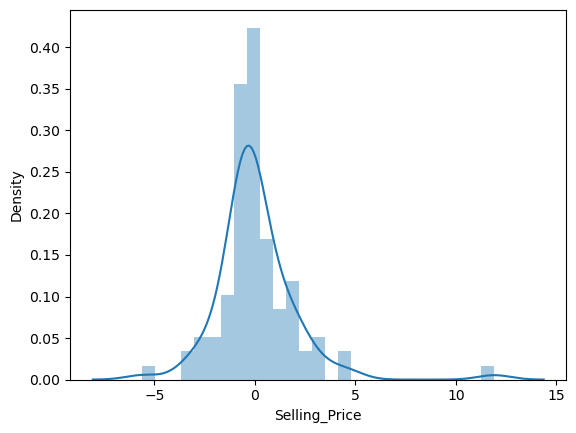

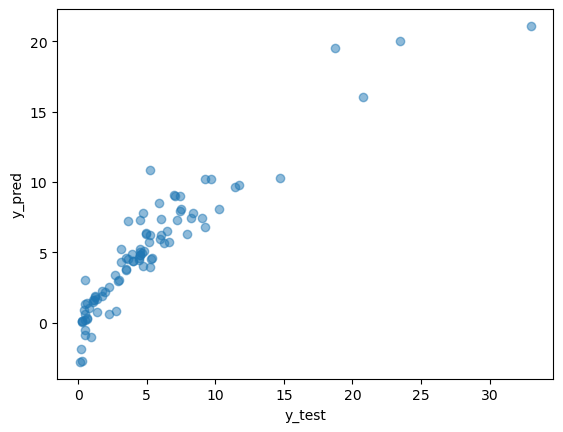

In [18]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Linear Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Lasso Regression Score on Training set is 0.8487540063533233
Lasso Regression Score on Test Set is 0.8173330675668595
Accuracies [0.76664228 0.88362862 0.75622206 0.9064063  0.81012813]
Accuracy: 82.46 %
Standard Deviation: 6.07 %
Mean Absolute Error: 1.3514352969328842
Mean Squared Error: 4.98161678810566
RMSE: 2.231953581082201
The r2_score is 0.8173330675668595


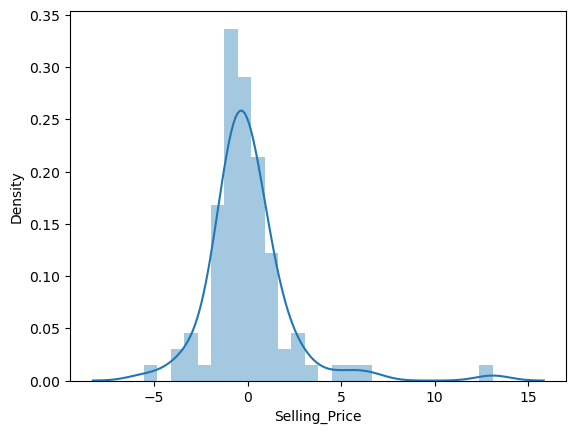

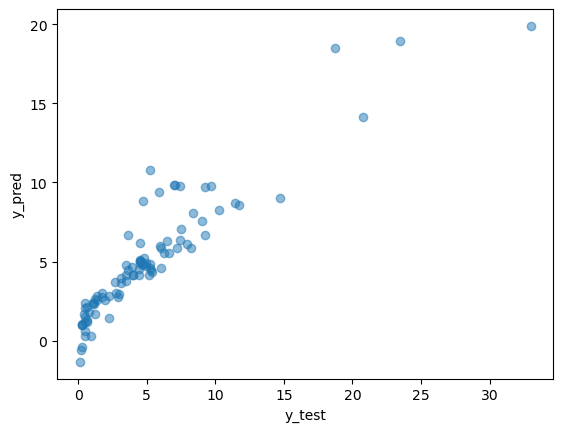

In [19]:
#Linear Regression
from sklearn.linear_model import  Lasso 
lr=Lasso()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Lasso Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Lasso Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Ridge Regression Score on Training set is 0.8938832671067193
Ridge Regression Score on Test Set is 0.851424269889119
Accuracies [0.81686694 0.83152742 0.81467353 0.8780506  0.82159621]
Accuracy: 83.25 %
Standard Deviation: 2.35 %
Mean Absolute Error: 1.2436386369078565
Mean Squared Error: 4.051895663690131
RMSE: 2.012932106080613
The r2_score is 0.851424269889119


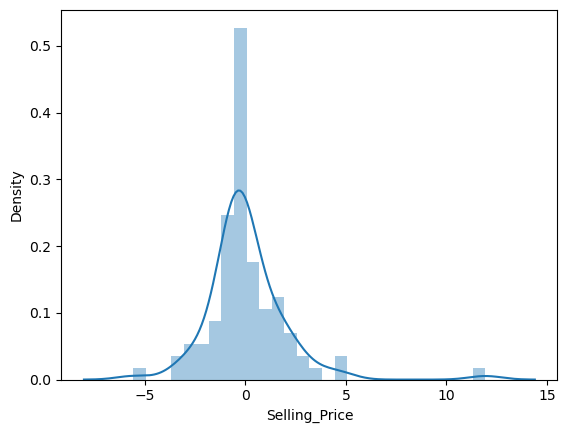

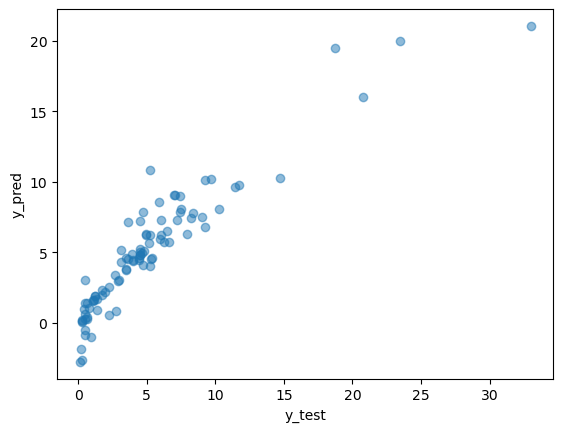

In [20]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Ridge Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Ridge Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Elastic net Regression Score on Training set is 0.85252856157487
Elastic net Regression Score on Test Set is 0.8230939897776701
Accuracies [0.76577476 0.88928848 0.77545387 0.90689332 0.80911383]
Accuracy: 82.93 %
Standard Deviation: 5.82 %
Mean Absolute Error: 1.3329148920365734
Mean Squared Error: 4.824507307927308
RMSE: 2.1964761113946376
The r2_score is 0.8230939897776701


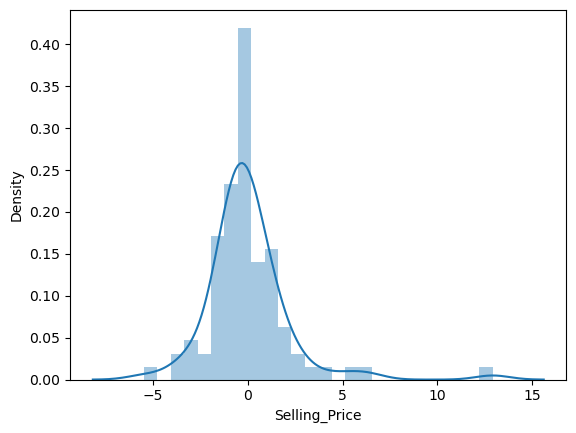

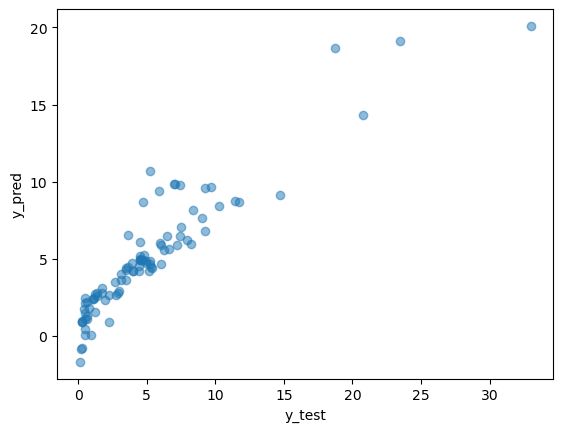

In [21]:
#Linear Regression
from sklearn.linear_model import ElasticNet
lr=ElasticNet()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print("Elastic net Regression Score on Training set is",lr.score(X_train, y_train))#Training Accuracy
print("Elastic net Regression Score on Test Set is",lr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lr, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Decision Tree Regressor

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.01684329366165327
Accuracies [0.69053724 0.7575954  0.96421685 0.92313787 0.82438566]
Accuracy: 83.20 %
Standard Deviation: 10.14 %
Mean Absolute Error: 1.7487912087912088
Mean Squared Error: 26.81224175824176
RMSE: 5.178053858182798
The r2_score is 0.01684329366165327


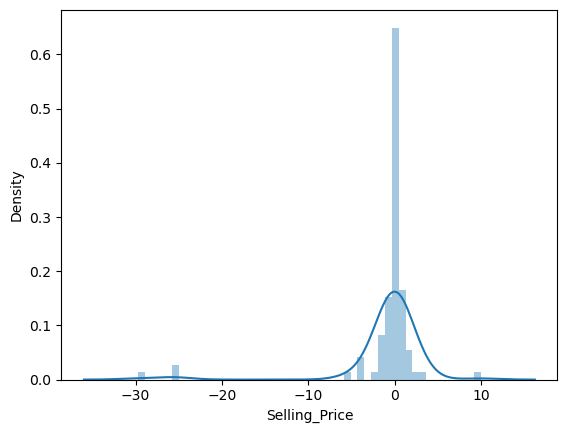

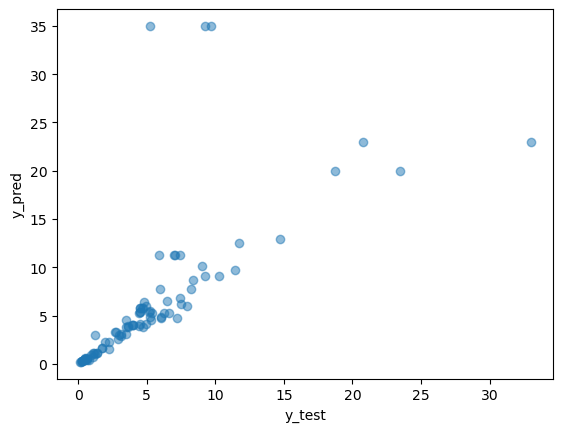

In [22]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print("Accuracies",accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Random Forest Regressor

Random Forest Score on Training set is 0.8887739366342782
Random Forest Score on Test Set is 0.8854297334328457
[0.76709221 0.76966434 0.77217102 0.95690378 0.83197413]
Accuracy: 81.96 %
Standard Deviation: 7.28 %
Mean Absolute Error: 0.8658518022598046
Mean Squared Error: 3.1245127716675256
RMSE: 1.7676291386112433
The r2_score is 0.8854297334328457


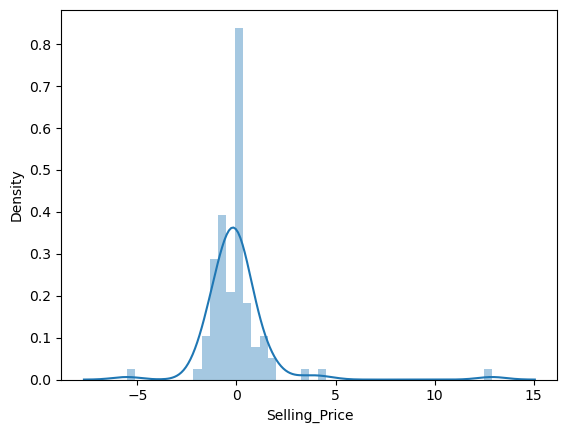

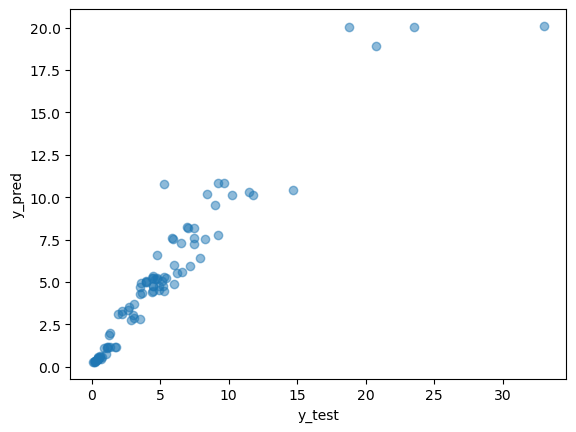

In [23]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [31]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [32]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=4, n_jobs = 1)

In [33]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estima

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=30,
                                                   max_features='auto',
                                                   min_samples_leaf=2,
                                                   min_samples_split=15,
                                                   n_estimators=400),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=4, scoring='neg_mean_squared_error', verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [35]:
prediction = rf_random.predict(X_test)

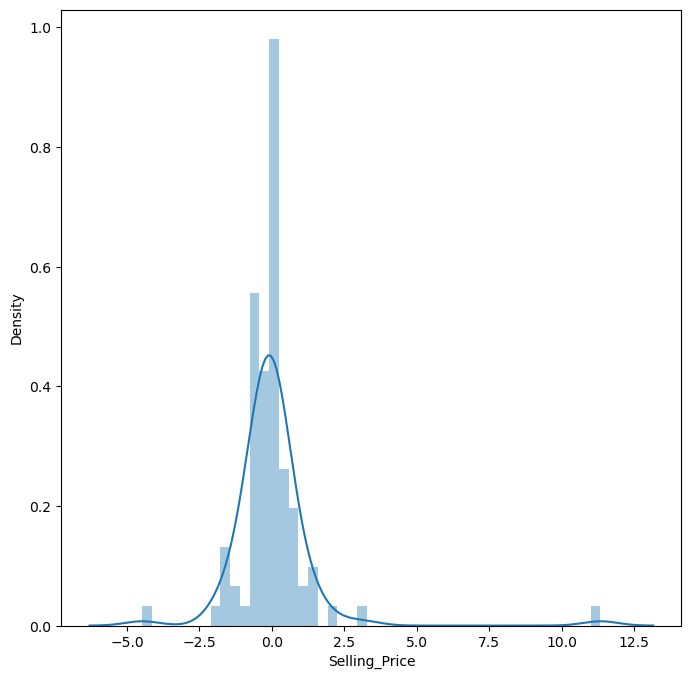

In [36]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

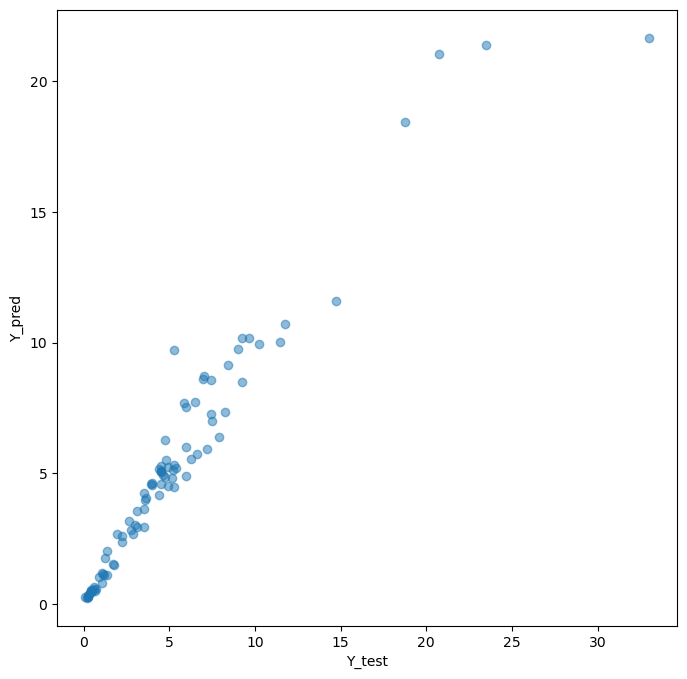

In [37]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [55]:
# calculate r2_score
r2 = metrics.r2_score(y_test, prediction)
print(r2)

0.9188722583717571


In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.6885489621489609
MSE: 2.2124821076977277
RMSE: 1.4874414636205782


# Save model to reuse it again

In [45]:
import pickle
# open a file, where you ant to store the data
file = open('RF_reg.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [46]:
model = open('RF_reg.pkl','rb')
forest = pickle.load(model)

In [47]:
Y_prediction = forest.predict(X_test)

In [48]:
metrics.r2_score(y_test, Y_prediction)
#Conclusion:--> r2-value is increased

0.9188722583717571